In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import csv

In [4]:
def find_first_last(arr):
    idx_first, idx_last = -1, -1
    for i in range(len(arr)):
        if arr[i]:
            idx_first = i
            break

    for i in range(len(arr)):
        if arr[i]:
            idx_last = i

    return idx_first, idx_last



def plot_boundaries(t, mu, navg, eps=5e-2):
    first_list = []
    last_list = []

    if type(eps) == float:
        eps_list = [eps for _ in range(len(t))]
    else:
        eps_list = eps

    for i in range(len(t)):
        idx_first, idx_last = find_first_last(np.abs(navg[::, i] - 1.0) < eps_list[i])
        first_list.append(idx_first)
        last_list.append(idx_last)
    
    stop_idx = 0
    for i in range(len(first_list)):
        if first_list[i] == last_list[i]:
            stop_idx = i
            break


    plt.plot(t[:stop_idx+1], mu[first_list[:stop_idx+1]], color="white", linestyle="--", linewidth=2)
    plt.plot(t[:stop_idx+1], mu[last_list[:stop_idx+1]], color="white", linestyle="--", linewidth=2)

In [326]:
# filename = "PhaseDiagram.npz"
D_list = [1, 2, 3, 4, 5, 10]
nsweeps_list = [20, 20, 20, 30, 30, 40]
filename_list = ["PhaseDiagram:N=50_maxoccupation=5_D={}_nsweeps={}.npz".format(D_list[i], nsweeps_list[i]) for i in range(len(D_list))]

<Figure size 432x288 with 0 Axes>

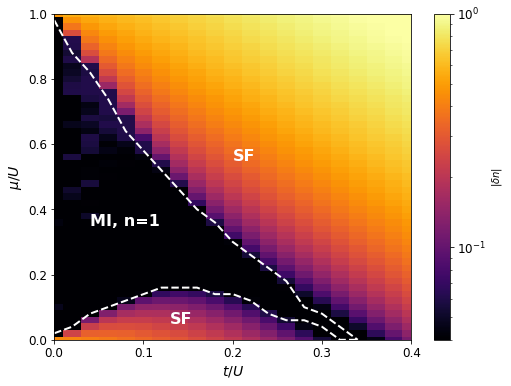

In [334]:
import matplotlib.colors as colors

f = filename_list[-1]
plt.figure()
data = np.load(f)
mu, t, navg = data["mu"], data["t"], data["navg"]
plt.figure(figsize=(8,6))
# plt.pcolormesh(t, mu, navg, cmap="inferno", vmin=0.8, vmax=2.0)
plt.pcolormesh(t, mu, np.abs(navg-1), cmap="inferno", norm=colors.LogNorm(vmin=4e-2, vmax=1e0))
k = 7
plot_boundaries(t, mu, navg, [*[6e-2 for _ in range(len(t)-k)], *[3e-2 for _ in range(len(t)-k, len(t))]])

plt.xlabel("$t/U$", fontsize=14)
plt.ylabel("$\mu/U$", fontsize=14)
# plt.title("$D = 10, \; n_{max}=5, \; $" + "nsweeps=40", fontsize=14)

plt.text(0.04, 0.35, "MI, n=1", color="white", weight="bold", fontsize=16)
plt.text(0.13, 0.05, "SF", color="white", weight="bold", fontsize=16)
plt.text(0.2, 0.55, "SF", color="white", weight="bold", fontsize=16)

plt.xticks(np.arange(0.0, 0.401, 0.1), fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0.0, 1.0)
plt.xlim(0.0, 0.4)
cb = plt.colorbar(label="$|\delta n|$")
cb.ax.tick_params(labelsize=12)
plt.savefig("results/PhaseDiagram.png", dpi=300)

(0.0, 6.0)

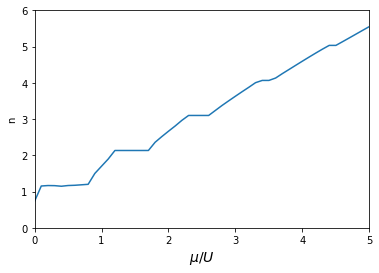

In [346]:
data = np.load("data/ladder.npz")
t = data["t"]
mu = data["mu"]
navg = data["navg"]

plt.plot(mu, navg)
plt.xlabel("$\mu/U$", fontsize=14)
plt.ylabel("n")
plt.xlim(0.0, 5.0)
plt.ylim(0, 6)

In [7]:
import matplotlib.colors as colors

f = "data/PhaseDiagram_Fine.npz"
data = np.load(f)
mu, t, navg, K, xi = data["mu"], data["t"], data["navg"], data["K"], data["xi"]

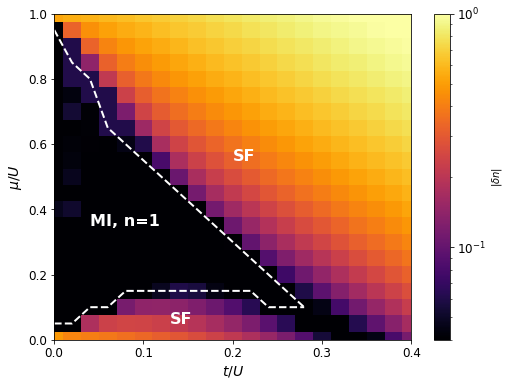

In [8]:
plt.figure(figsize=(8,6))
# plt.pcolormesh(t, mu, navg, cmap="inferno", vmin=0.8, vmax=2.0)
plt.pcolormesh(t, mu, np.abs(navg-1), cmap="inferno", norm=colors.LogNorm(vmin=4e-2, vmax=1e0))
k = 7
plot_boundaries(t, mu, navg, [*[6e-2 for _ in range(len(t)-k)], *[3e-2 for _ in range(len(t)-k, len(t))]])

plt.xlabel("$t/U$", fontsize=14)
plt.ylabel("$\mu/U$", fontsize=14)
# plt.title("$D = 10, \; n_{max}=5, \; $" + "nsweeps=40", fontsize=14)

plt.text(0.04, 0.35, "MI, n=1", color="white", weight="bold", fontsize=16)
plt.text(0.13, 0.05, "SF", color="white", weight="bold", fontsize=16)
plt.text(0.2, 0.55, "SF", color="white", weight="bold", fontsize=16)

plt.xticks(np.arange(0.0, 0.401, 0.1), fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0.0, 1.0)
plt.xlim(0.0, 0.4)
cb = plt.colorbar(label="$|\delta n|$")
cb.ax.tick_params(labelsize=12)
# plt.savefig("results/PhaseDiagram.png", dpi=300)

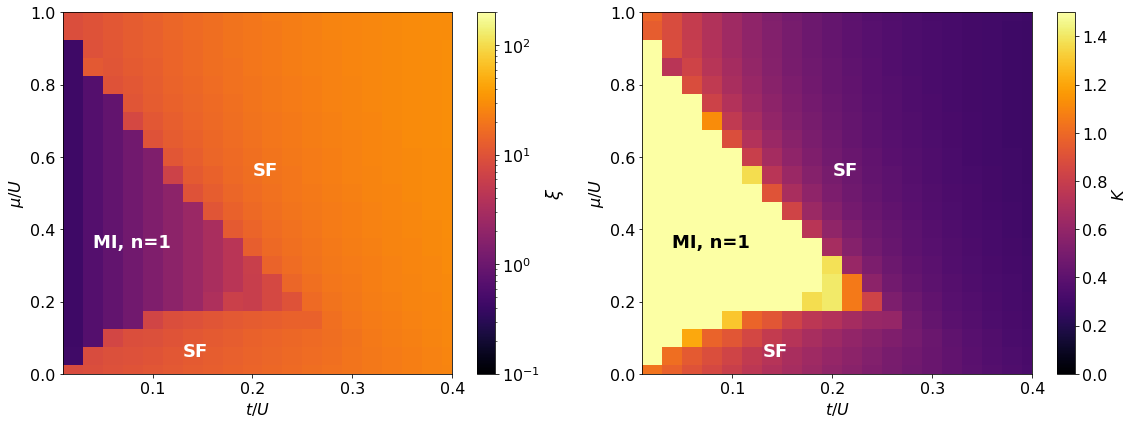

In [58]:
fontsize=16
plt.figure(figsize=(16,6))

plt.subplot(121)
pc1 = plt.pcolormesh(t, mu, xi, cmap="inferno", norm=colors.LogNorm(vmin=1e-1, vmax=2e2))
k = 7
plt.xlabel("$t/U$", fontsize=fontsize)
plt.ylabel("$\mu/U$", fontsize=fontsize)

plt.text(0.04, 0.35, "MI, n=1", color="white", weight="bold", fontsize=fontsize+2)
plt.text(0.13, 0.05, "SF", color="white", weight="bold", fontsize=fontsize+2)
plt.text(0.2, 0.55, "SF", color="white", weight="bold", fontsize=fontsize+2)

plt.xticks(np.arange(0.0, 0.401, 0.1), fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.ylim(0.0, 1.0)
plt.xlim(0.01, 0.4)
cb1 = plt.colorbar(pc1)
cb1.ax.tick_params(labelsize=fontsize)
cb1.set_label("$ \\xi $", fontsize=fontsize+2)



plt.subplot(122)
pc2 = plt.pcolormesh(t, mu, K, cmap="inferno", vmin=0, vmax=1.5)
k = 7

plt.xlabel("$t/U$", fontsize=fontsize)
plt.ylabel("$\mu/U$", fontsize=fontsize)

plt.text(0.04, 0.35, "MI, n=1", color="black", weight="bold", fontsize=fontsize+2)
plt.text(0.13, 0.05, "SF", color="white", weight="bold", fontsize=fontsize+2)
plt.text(0.2, 0.55, "SF", color="white", weight="bold", fontsize=fontsize+2)

plt.xticks(np.arange(0.0, 0.401, 0.1), fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.ylim(0.0, 1.0)
plt.xlim(0.01, 0.4)
cb2 = plt.colorbar(pc2)
cb2.ax.tick_params(labelsize=fontsize)
cb2.set_label("$K$", fontsize=fontsize)

plt.tight_layout()
plt.savefig("results/correlation_lengths.png", dpi=300)
plt.savefig("results/correlation_lengths.pdf", dpi=300)

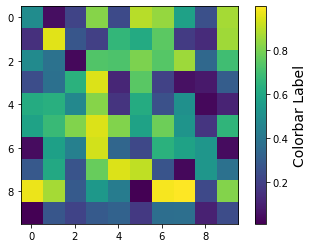

In [42]:
# Create some data
data = np.random.rand(10, 10)

# Create a figure and axis
fig, ax = plt.subplots()

# Display the data as an image
cax = ax.imshow(data, cmap='viridis')

# Create a colorbar and set its label
cbar = plt.colorbar(cax)
cbar.set_label('Colorbar Label', fontsize=14)

# Show the plot
plt.show()


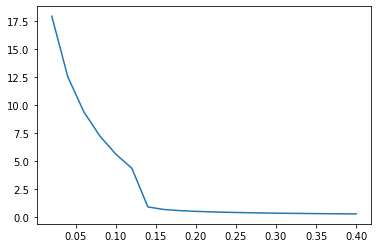

In [29]:
plt.plot(t, K[10])